# Assignment 2 - Weekly step count trend analysis

## Introduction

Our group's High level driving questions is "What are the trends in my week to week data?" In this project, we will explore the trends in people's step count based on the drive question. And we will ask six sub-questions to help the audience better understand the step count of the respondents.<br>
Author:Shangfei Wang;(date:2022/10/30, end date: 2022/10/30)

## Bias

Selection bias
The people participating in the study may be more of some people who like to walk or run, and their step count may be on the high side.

Survivorship bias: Because our data sample is not large, it may be affected by participants with extreme exercise habits.

And in the experiment, we asked the wearer to wear the tracking device as required for a certain period of time. If it is not worn, it will also have a certain impact on our conclusions.

Author:Shangfei Wang;(date:2022/10/30, end date: 2022/10/30)

## Limitations

- The sample size is not large enough, only nine months of data are available, which is approximately 36 weeks in length.
- The identity of the participants is unknown and the results may not be generalisable

Author:Xin Guo;(date:2022/10/30, end date: 2022/10/30)

## Import packages and Read Data

Below are the packages that need to be used. 'datetime' is used to aid in the analysis of time data.

In [1]:
# Date started: 02/10/2022
# Date ended: 30/10/2022

import csv
import time
import math
import calendar
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import date
from datetime import datetime
from pandas.core.frame import DataFrame
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.patches as mpatches

Read the required data from github.

In [2]:
# Date started: 02/10/2022
# Date ended: 05/10/2022

#get the raw data from the github
url = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-01.csv?token=GHSAT0AAAAAAAAAHGL3SCR27UFH4C32ZD52Y3DOANA"
# url2 = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-02-detail.csv?token=GHSAT0AAAAAAAAAHGMVHJO324NORIBVS3E4Y3CHNIA"  
url_detail = "https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/Participant-01-second-detail.csv?token=GHSAT0AAAAAAAAAHGL3EGH3SERWBAUSWX7OY3DSOBA"  

# use panda to read this csv
p = pd.read_csv(url)
p_detail = pd.read_csv(url_detail)


## Data clean

In [3]:
# Date started: 02/10/2022
# Date ended: 05/10/2022

def clean_undetailed_data(df):
    #change foramt to datetime
    df['Start'] = pd.to_datetime(df['Start'])
    df['Finish'] = pd.to_datetime(df['Finish'])
    #change the datetime format as yyyy-mm-dd
    df['Start'] = df['Start'].dt.strftime('%Y-%m-%d')
    df['Finish'] = df['Finish'].dt.strftime('%Y-%m-%d')
    #group by start time and count the steps
    day_data1 = df.groupby(['Start']).sum()
    # add index
    day_data1 = day_data1.reset_index(drop=False)
    #first change the data type to datetime
    day_data1['Start'] = pd.to_datetime(day_data1['Start'])
    #use resample to integrate the data into weekly
    week_data1 = day_data1.resample('W', on="Start").sum()
    #added numbers to record each week
    week_data1['weeks'] = range(len(week_data1))
    return day_data1, week_data1

def clean_detailed_data(df):
    data = pd.DataFrame({"Date": df['Date'], "Count":df['Count']})
    # convert type of 'Date' to Datetimes type
    data['Date'] = pd.to_datetime(data['Date'])
    # keep data in 2022
    result = data[(data['Date'] >= '2022-01-01') & (data['Date'] <= '2022-12-31')]
    return result

In [4]:
# Date started: 02/10/2022
# Date ended: 05/10/2022

day_data1, data1 = clean_undetailed_data(p)

## High level driving questions

High level driving questions: What are the trends in my week to week data?

This section will briefly describe and draw an image for our high level driving question. We want to use a line graph to show the trend of participants' weekly step counts. On the way below, the x-axis is the number of weeks and the y-axis is the number of steps.  

Author:Shangfei Wang;(date:2022/10/30, end date: 2022/10/31)

Text(0.5, 0, 'weeks')

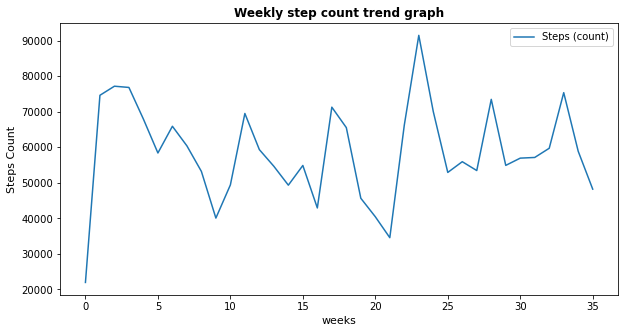

In [5]:
# Date started: 02/10/2022
# Date ended: 10/10/2022

data1.plot(x='weeks',y = 'Steps (count)',figsize = (10,5))
plt.title('Weekly step count trend graph',fontsize='large',
          fontweight='bold',
          color='black')
plt.ylabel('Steps Count',
               fontsize = 11)
plt.xlabel('weeks',
               fontsize = 11)


By observing the above picture, you can understand the trend of the participants' step count according to the blue line. In subsequent sub-questions, our panelists will make more different analyses to help the audience better understand this participant.  

Author:Shangfei Wang;(date:2022/10/30, end date: 2022/10/31)

## Sub question 1

*Sub-question by Tianshu Shen*

The sub question is "Is there a connection between the number of steps a participant takes each week and the number of days in the week that are public holidays?". Retrieve additional data sets that I will use in my sub question. This additional DataFrame introduced includes the names, dates and additional text descriptions of all legal holidays in Australia in 2022.

Data from https://www.australia.gov.au/public-holidays.

Author:Tianshu Shen;(date:2022/10/25, end date: 2022/10/30)

In [6]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

# Information on all statutory holidays for 2022 obtained from the Australian Government website

sub_path = ('https://raw.github.sydney.edu.au/xguo0149/2022-DATA3406-RE06-Group04/main/src/resources/australian-public-holidays-combined-2022.csv?token=GHSAT0AAAAAAAAAG3KIM4T7IBOQEOQSIFFEY3DSYMQ')
sub_data_file = pd.read_csv(sub_path)



Four functions that I will use several times in the after analysis.

These functions are mainly used to handle temporal formats and data types in the dataset.

Author:Tianshu Shen;(date:2022/10/25, end date: 2022/10/30)

In [7]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

# A functions to define the midpoint of a date
def get_time(DateTime):
    DateTime = datetime.strptime(DateTime,'%Y-%m-%d')
    return DateTime

# For each time period, I select the midpoint of this time period for subsequent analysis
def mid_point(start, finish):
    start, finish = get_time(start), get_time(finish)
    return start+(finish-start)/2

# Another function to define the midpoint of a date
def get_sub_time(DateTime):
    DateTime = datetime.strptime(DateTime,'%Y%m%d')
    return DateTime

# This function lets me know which week of 2022 a certain time belongs to
def week_num(week_start, week_end):

    year_week_num = 52    # print(datetime.strftime(datetime(2020, 12, 31), "%W"))
    week_end_year = week_end.year
    week_start_year = week_start.year
    week_end_num = int(datetime.strftime(week_end, "%W"))
    week_start_num = int(datetime.strftime(week_start, "%W"))

    return (week_end_year - week_start_year) * year_week_num + week_end_num - week_start_num

The work of stage 1 includes reconstructing the DataFrame, cleaning of invalid data and obtaining the midpoint of the time period.

Then each date was also aggregated according to which week it belonged to.  

Author:Tianshu Shen;(date:2022/10/25, end date: 2022/10/30)

In [8]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def STAGE_1(p):
    # Delete all rows where Steps (count) is 0
    data_file = p.drop(p[p['Steps (count)'] == 0].index)
    
    # Process the Start and Finish columns
    count_list, count = [], 0
    for m in data_file['Start']:
        count_list.append(m)
    for n in data_file['Finish']:
        count_list[count] = count_list[count]+"/"+n
        count+=1

    # Make new DataFrame with mid and count
    mids, steps = [], []
    for i in count_list:
        start, finish = i.split("/")
        mid = mid_point(start, finish)
        mids.append(mid)
    for i in data_file['Steps (count)']:
        steps.append(i)
    mid_step = {
        "mid": mids,
        "steps": steps
    }
    mid_step = DataFrame(mid_step)

    # other dataframes from weekdays
    mid_weekday_all = []
    for m in mids:
        n = m.weekday()
        mid_weekday_all.append(n)

    mid_weekday_step = {
        "mid_weekday" : mid_weekday_all,
        "steps" : steps
    }

    mid_weekday_step = DataFrame(mid_weekday_step)

    # Separate the data according to the day of the week.
    names = locals()  # call dynamic variable name
    for i in range(1,8):
        item = mid_weekday_step[mid_weekday_step.mid_weekday == i]
        names['mid_' + str(i) ] = item
        
        week_count_list = []
    for i in mids:
        week_count = week_num(mids[0], i)
        week_count_list.append(week_count)

    mid_day_weekday_step = {
        "date" : mids,
        "week" : week_count_list,
        "weekday" : mid_weekday_all,
        "steps" : steps
    }
    
    mid_day_weekday_step = DataFrame(mid_day_weekday_step)
    step_groupby_week = mid_day_weekday_step.groupby("week").agg('sum')  # if no agg, returns memory address.
    
    return mids, step_groupby_week

Stage 2 works on the legal holiday dataset introduced from external sources.

The work here includes cleaning up the data, unifying the date format, and removing holiday data that is outside the data time range of the participants.  

Author:Tianshu Shen;(date:2022/10/25, end date: 2022/10/30)

In [9]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def STAGE_2 (sub_data_file):
    
    # Succession of results from stage 1
    mids = STAGE_1 (p)[0]

    # Refine data, remove unnecessary columns.
    sub_data_file_clean = sub_data_file.drop('_id', axis = 1).\
                                        drop('Information', axis = 1).\
                                        drop('More Information', axis = 1)
    # Deletion of data outside of New South Wales
    sub_data_file_nsw = sub_data_file_clean.drop(sub_data_file_clean[sub_data_file_clean['Jurisdiction'] != 'nsw'].index)

    holidays = []
    for i in sub_data_file_nsw['Date']:
        sub_date = get_sub_time(str(i))
        sub_week_count = week_num(mids[0], sub_date)
        if int(sub_week_count) <=36:  # Delete data from days that have not yet come
            holidays.append(sub_week_count)

    sub_week = [i for i in range(0,36)]

    sub_prop, week_count = [], 0
    while week_count < 36:
        if week_count in holidays:
            sub_prop.append(float(3/7)) # if there is a holiday this week, it is a three-day holiday
        else:
            sub_prop.append(float(2/7))
        week_count += 1

    holiday_data = {
        "week" : sub_week,
        "Proportion" : sub_prop
    }
    holiday_data = DataFrame(holiday_data)
    
    return holiday_data

The work in stage 3 inherits the results of stage 1 and 2 and visualizes them. 

A lot of space is devoted to setting titles, axes, chart styles and labels.  

Author:Tianshu Shen;(date:2022/10/25, end date: 2022/10/30)

In [10]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def STAGE_3() -> None:
    
    # Succession of results from stage 1 & 2
    step_groupby_week, holiday_data = STAGE_1 (p)[1], STAGE_2 (sub_data_file)

    # create figure and axis objects with subplots()
    fig,ax = plt.subplots(figsize = (18,5))
    # make a plot
    lns_left = ax.plot(step_groupby_week.index, 
            step_groupby_week['steps'],
            color = "orange", 
            marker = "o",
            label = 'Participants weekly step')
    # set x-axis label
    ax.set_xlabel("Weeks in 2022", fontsize = 14)
    # set y-axis label
    ax.set_ylabel("Steps Count",
                  color = "orange",
                  fontsize = 14)

    # twin object for two different y-axis on the sample plot
    ax2 = ax.twinx()
    # make a plot with different y-axis using second axis object
    lns_right = ax2.plot(holiday_data['week'],
             holiday_data['Proportion'],
             color = "green",
             marker = "o",
             label='Statutory Holidays')
    ax2.set_ylabel("holiday Proportion",
                   color = "green",
                   fontsize = 14)
    plt.ylim((0, 1))  # Set the interval of the second y coordinate between 0-1

    x_major_locator=MultipleLocator(2)
    ax = plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    
    # Make two separate legends appear together
    lns = lns_left + lns_right
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc = 0)
    
    # Give title
    plt.title("Connection between participants' weekly steps and number of holidays in a week",
          fontsize='large',
          fontweight='bold',
          color='black')
    
    plt.grid()  # Display Grid
    plt.show()  # Show the plot

The final results of my sub question are shown here, a line graph that includes the number of steps participants took each week and the percentage of holidays in each week. These two data sets have their own vertical coordinates: the vertical coordinate for steps is on the coordinate, and the vertical coordinate for holidays is on the right. At the same time, they share a common horizontal coordinate. This horizontal coordinate is for each week of the entire time period for this participant.

If we need to determine whether there is a relationship between participants' weekly steps and weekly holidays, we can observe whether there is uniformity in the trend of their respective rise and fall. If there is, then there is a relation between them; if not, then there is no relationship.  

Author:Tianshu;(date:2022/10/25, end date: 2022/10/30)

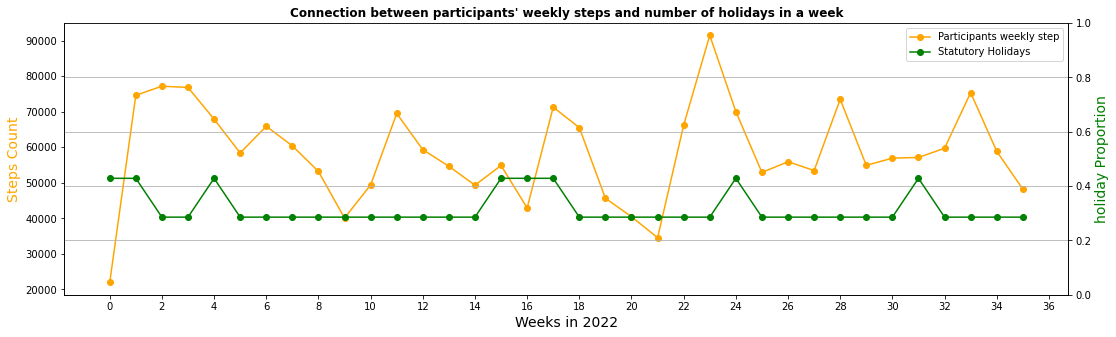

In [11]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

# Demonstrate the final results of data analysis and visualization
STAGE_3()

## Sub question 2

*Sub-question by Xin Guo*

The sub question is "Are the trend of weekly step count the same between summar and winter?"

This is a confirmatory analysis

purpose: we want to compare the trend of steps in summar and winter

 what does the code do: plots line plot which shows the trend of participants' weekly exercise steps.

key aspects of code design: the steps of a aprticipant in a unit time should integer type, 
    because float does not make sense for step count
    
Author:Xin Guo;(date:2022/10/25, end date: 2022/10/30)

The code below will show a line graph of the weekly step total, where the x-axis represents the date of the first day of the week; the y-axis represents the weekly step total. Since my question is about comparing weekly steps in winter and summer, I will mainly look at the line graphs for January to March and June to August. In addition to this, it is important to look at the trend (up/down) of the line, rather than the highest and lowest points of the line.

Author:Xin Guo;(date:2022/10/25, end date: 2022/10/30)

In [12]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def question_2(data1):
    data1 = pd.concat([data1, data1]).sort_values("weeks")
    
    # generate seasonality decomposition additive analysis
    decomposition_add = seasonal_decompose(data1["Steps (count)"], model='additive', period=4)

    # the analysis includes two part: trend and seasonality
    trend = decomposition_add.trend
    season = decomposition_add.seasonal
    
    # plot: set the legnth and width of plot
    fig, axes = plt.subplots(1, 1, sharex=True, sharey=False)
    fig.set_figheight(5)
    fig.set_figwidth(10)
    
    # plot: line plot; set legend, legend location,, x label, ylabel, title
    axes.plot(trend, label='Trend', color = "blue")
    axes.legend(loc='upper left')
    axes.title.set_text('Trend of Weekly Steps')
    axes.set_xlabel('Week Number')
    axes.set_ylabel('Step Count')
    return
    

concludsion: This graph will show a line graph of the trend in weekly step counts, 
we could get the trend of weekly steps in winter and summar, then based on the line plot, we could compare and summary the trend.

Author:Xin Guo;(date:2022/10/25, end date: 2022/10/30)

what to focus on: the line trend in from 2022-01 to 2022-03, and 2022-06 to 2022-07, check the line is increasing or decearsing.

Author:Xin Guo;(date:2022/10/25, end date: 2022/10/30)

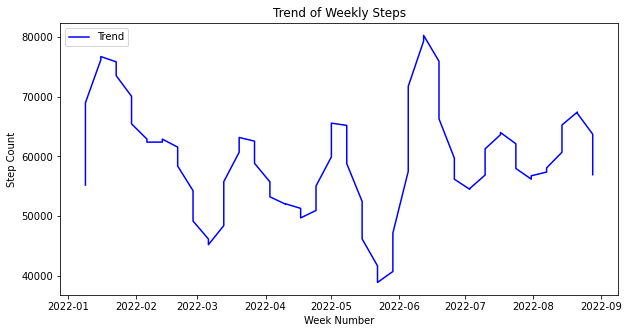

In [13]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

question_2(data1)

## Sub question 3

*Sub-question by Shangfei Wang*

This sub-question is "Is weekly steps predictable?". It will make predictions on the participant's step count through an ARIMA model. I want to predict the data for June to September by taking the data for the first 5 months. And judge whether it is the same as the actual number of steps from June to September. Clean up and draw the image through the data. If there is a relatively obvious difference, it proves that the change in the number of steps may be affected by many factors, and it cannot be accurately predicted.  

Author:Shangfei Wang;(date:2022/10/25, end date: 2022/10/30)

In [14]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def question_3(day_data1):
    # Convert the time unit to days and use "Start" as the index.
    new_day_data1 = day_data1.resample('d', on="Start").sum()
    
    # Create a rolling average using pandas.datafframe.rolling with a window size of 10.
    new_day_data1['rolling_av'] = new_day_data1['Steps (count)'].rolling(10).mean()
    ARMA_model = ARIMA(endog=new_day_data1['Steps (count)'], order=(0, 0, 10))
    results = ARMA_model.fit()

    # The date range you wish to forecast
    start_date = '2022-06-01'
    end_date   = '2022-09-01'
    
    # Forecast for the selected date range.
    new_day_data1['forecast'] = results.predict(start=start_date, end=end_date)  # Forecast for the selected date range.

    # Make a new form
    a = new_day_data1[['Steps (count)','rolling_av','forecast']]
    
    # Adjusted to weeks as the time unit
    pre_df = a.resample('w').sum()
    
    # Draw the image
    pre_df[['Steps (count)','forecast']].plot(lw=2);
    plt.title('Comparison of predicted steps and actual steps')

    return

For this sub-problem, I chose to use a line chart to show it. Because the line chart can show the changing trend of the data very well. In the figure below, the x-axis is the number of steps, and the y-axis is the time axis in weeks. The blue line is the trend of actual weekly steps. The yellow line is the trend of predicted steps. The prediction range can modify the code as needed. Because the forecast time I selected is June to September, the yellow line will show 0 until June. The yellow line is the forecast step trend from June to September. By comparing the degree of coincidence of the blue and yellow polylines, we can judge whether the two polylines have the same trend.  

Author:Shangfei Wang;(date:2022/10/25, end date: 2022/10/30)

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


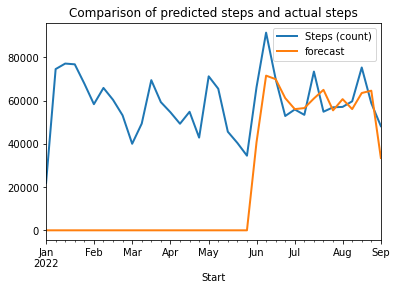

In [15]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

# Use functions to display images
question_3(day_data1)

If the blue polyline and the yellow polyline roughly overlap the June-September portion, the participant's step count can be considered predictable. If they do not coincide, it proves that the participant steps are unpredictable.  

Author:Shangfei Wang;(date:2022/10/25, end date: 2022/10/30)

## Sub question 4

*Sub-issue by Audrey*

The sub question 'whether people have any perferences about which week to do more exercises in a month' will be explored in this section.<br>
**Note**: only detailed data are accpetable in this section, since all three datasets that I have choosed are detailed data.  

Author:Audrey;(date:2022/10/31, end date: 2022/10/31)

Read detailed data in, and save the dataset into varibale data2.  

Author:Audrey;(date:2022/10/31, end date: 2022/10/31)

In [16]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

data2 = clean_detailed_data(p_detail)


After reading data, I will plot a scatter plot to show weeks with max participants steps count over 9 month. All data will be grouped by week firstly, then I will find out which weeks that each date belongs to. Finaly, group data by month, and find out a week with max steps count per month.  

Author:Audrey;(date:2022/10/31, end date: 2022/10/31)

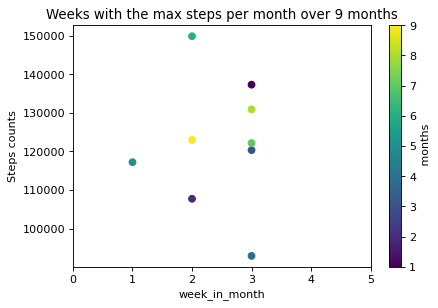

In [17]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

# Note again, this code block only works for detailed datasets:

## Group all data by weeek and extract month of a date.
def weekly_data(df):
    df['Date'] = pd.to_datetime(df['Date'])
    # group data by date
    per_day_data =  df.groupby(['Date']).sum()
    # convert data seriers index to data column
    per_day_data.reset_index(inplace=True)
    # group per_day data by week.
    weekly_data = per_day_data.resample('W', on="Date").sum()
    #convert data seriers index to data column
    weekly_data.reset_index(inplace=True)
    # extract month from date and save 'month' into month column.
    weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
    return weekly_data

## find out which week each date belongs to in a month
def find_week_in_month(df):
    # add_week_of_month
    df['week_in_month'] = df['Date'].apply(lambda x : x.day)/7
    df['week_in_month'] = df['week_in_month'].apply(lambda x: math.ceil(x))
    return df

data2_weekly = weekly_data(data2)
data2_with_week =find_week_in_month(data2_weekly)
## group by month, and filter the week with max steps count.
data2_final = data2_with_week.groupby('month').apply(lambda t: t[t.Count==t.Count.max()])


## visualization:
def visualize(group_data):
    plt.figure(dpi=80)
    plt.scatter(group_data['week_in_month'], group_data['Count'], c = group_data['month'], cmap = 'viridis')
    plt.xlabel("week_in_month")
    plt.ylabel("Steps counts")
    x = [0,1, 2, 3, 4, 5]
    values = range(len(x))
    plt.xticks(values,x)
    plt.title("Weeks with the max steps per month over 9 months")
    plt.colorbar().ax.set_ylabel(' months')
    return

visualize(data2_final)


As plot showed above, this participant walks a little bit more in week3, but it is not a common conclusion. If we compare all other detailed data together, it is easy to find that there is no specific week that the participant ususallly walk a lot over 9 months since all the points are scattered randomly. Therefore, no perference is the final conlusion and it applies to all provided detailed datasets.  

Author:Audrey;(date:2022/10/31, end date: 2022/10/31)

## Sub Question 5


*Sub-issue by Tiannan Chen*

The code below is Tiannan Chen's sub question code. Bringing the cleaned raw data into the function below will generate a histogram and a horizontal red line as the standard line. The x-axis of the histogram is time, which is The number of weeks, the y-axis is the number of steps and the number of steps taken in a week. Then Tiannan Chen's sub question is "whether a person's movement can be seen from the number of steps per week?" It can be seen intuitively from the figure that the set red horizontal line is the standard activity level for one week, and higher than the red line indicates that this The activity level of each participant in this week has reached the standard. If it is lower than the red line, it means that the activity volume has not reached the standard. If you want to compare the activity levels of different participants, you should also look at the number of weeks that exceed the red line. The activity of each participant is high.  

Author:Tiannan Chen;(date:2022/10/25, end date: 2022/10/30)

In [18]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def question_5(wd):
    # the x-axis data
    x = wd['weeks']
    # the y-axis data
    y = wd['Steps (count)']
    # use bar plot
    plt.bar(x,y)
    # name the x-axis
    plt.xlabel('Time (weeks)')
    # name the y-axis
    plt.ylabel('Steps')
    # set the standard line and colored red
    plt.axhline(70000, color = "r")
    #show the plot
    plt.title("Weekly steps compared to 70,000 steps")
    return 

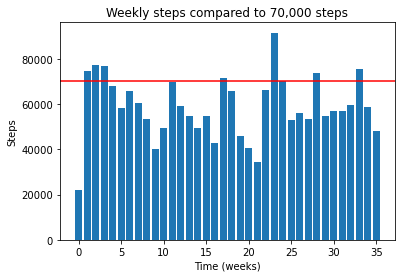

In [19]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

question_5(data1)

## Sub Question 6

*Sub-question by Sheng Wang*

The sub-question is "Is the significance of week days on week step total the same as weekends? Are they equal or different.".
We will compare weekly steps where weekend were dropped with weekly steps dropped monday tuesday.

We first create dataframe of participants then save the weekly data with dropped dates.

Author:Sheng Wang;(date:2022/10/25, end date: 2022/10/30)

In [20]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def question_6(d):
    #Drop weekends
    d1 = d[pd.to_datetime(d.Start).dt.weekday < 5]
    #drop monday and tuesday
    day_exclusion = [0,1]
    d2 = d[~(pd.to_datetime(d['Start']).dt.weekday.isin(day_exclusion))]
    #create data frame of the two dropped weekly data
    h = pd.DataFrame({"Start": pd.to_datetime(d['Start']), "Steps1":d1['Steps (count)'],'Steps2':d2['Steps (count)']})
    e1 = h.resample('W', on="Start").sum()#resample to combine days into weeks
    f3 = e1.reset_index(drop=False)#give index again
    return f3

Weekly data were prepared.

Author:Sheng Wang;(date:2022/10/25, end date: 2022/10/30)

#### plot 1
The two weekly step data with dropped dates are being compared. As seen in the below line graph with y-axis as step counts and x axis as week number.  

Author:Sheng Wang;(date:2022/10/25, end date: 2022/10/30)

In [21]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

def question_6_plot(e):
    #plot the two columns created
    plt.title('Comparidon plot of Participant')#title
    plt.plot(e.index, e['Steps1'], color="red",marker="o") #one graph
    plt.xlabel('Week')# axis labels
    plt.ylabel('Count')
    plt.plot(e.index, e['Steps2'], color="green",marker="o")#two graph
    plt.xticks(rotation=90)#rotate x axis 
   
    x_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    plt.xlim(1)  # Set the x range matching the dataframe above

    A = mpatches.Patch(color='red', label='Week_Step_count_total_minus_Monday_and_Tuesday')
    B = Week_Step_count_total_minus_the_weekend = mpatches.Patch(color='green', label='Week_Step_count_total_minus_the_weekend')
    plt.legend(handles=[A,B])# Prpduce lengend
  
    return plt.show()#show graph

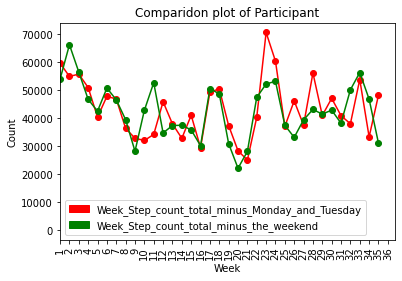

In [22]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

question_6_plot(question_6(day_data1))

We can see the difference of the two sets of weekly step count. And compare the effect of weekdays and weekend steps via the plot.  

Author:Sheng Wang;(date:2022/10/25, end date: 2022/10/30)

#### Paired t-test
We will perform a hypothesis test on the two lines shown above, to how confident can we say they are the same.

Hypothesis： That weekend steps has same impact on weekly steps as monday and tuesday steps.
With alpha = 0.05 as significant result.  

Author:Sheng Wang;(date:2022/10/25, end date: 2022/10/30)

In [23]:
# Date started: 19/10/2022
# Date ended: 29/10/2022

#perform paired t-test to test the difference in weekday and weekend differences. Participant 4
def stat(f):
    a = stats.ttest_rel(f['Steps1'],f['Steps2'])
    return a
stat(question_6(day_data1))

Ttest_relResult(statistic=0.05383938972457909, pvalue=0.9573692720805081)

So we can devided whether the result meets our hypothesis by looking at the percentage of error, while also referring to the graphs above. When the value is less than 0.05 we would accept the hypothesis, if not the hypothesis is not significantly shown by the dataset.  

Author:Sheng Wang;(date:2022/10/25, end date: 2022/10/30)

## Conclusion

By analyzing the six sub-questions raised by the panelists, we have come to some conclusions. Among them, there is not a specific trend of how participants exercises weekly. Thus, trends in step count data are difficult to predict. People's living habits may even be the reason why their steps have different trends at different times. Seasons, holidays, weekends and other factors cannot have an absolute impact. We hope that our research can help viewers to understand more about the trend of weekly steps.  

Author:Shangfei Wang;(date:2022/10/30, end date: 2022/10/30)